In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.preprocessing import StandardScaler

# Data Gathering

In [2]:
raw_data = pd.read_csv('diabetes.csv')

uncleaned_data = raw_data.copy(deep=True)

In [3]:
raw_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### There are many 0s in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] lets remove them

In [4]:
raw_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
raw_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = raw_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace({0:np.nan})

In [7]:
raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


# Data Cleaning

In [8]:
ls = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for attribute in ls:
    median_attribute = raw_data[attribute].median()
    raw_data[attribute] = raw_data[attribute].fillna(median_attribute)

raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


# EDA : Analysis

In [9]:
max(raw_data['Pregnancies'].unique())

17

In [10]:
#sns.pairplot(raw_data,hue='Outcome')

# Heatmap for uncleaned_data

<AxesSubplot:>

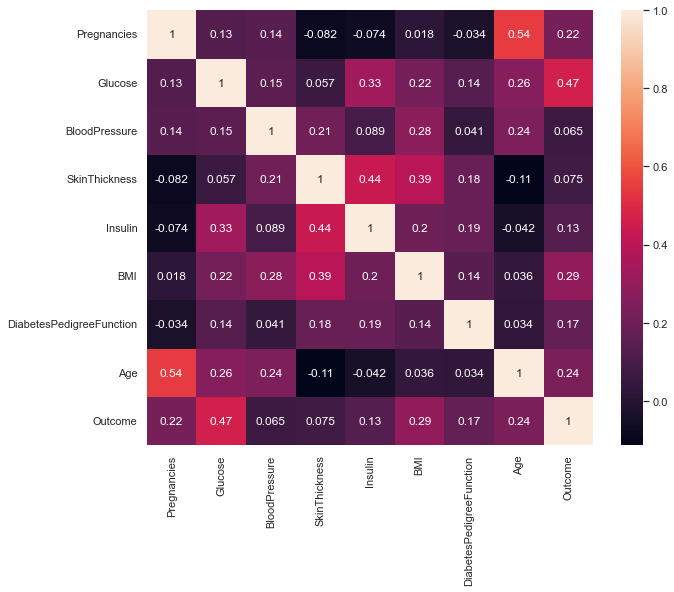

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(uncleaned_data.corr(),annot=True)

# Heatmap for Cleaned Data

<AxesSubplot:>

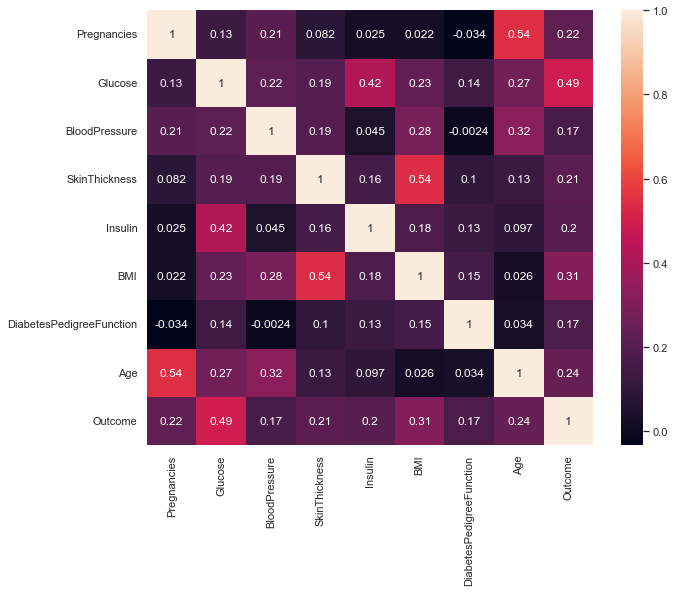

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(raw_data.corr(),annot=True)

In [13]:
X = raw_data.drop('Outcome',axis=1)
Y = raw_data['Outcome']

# Standardization 

In [14]:
scaler = StandardScaler()

In [15]:
scalerfit = scaler.fit(X)
scaled_data = scalerfit.transform(X)

# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score

In [17]:
X_train, X_test,Y_train, Y_test = train_test_split(scaled_data, Y,test_size=0.3,random_state=365,stratify=Y)

# Model Train

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=1) # K = 1

In [20]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
# R square for Test
knn.score(X_test,Y_test)

0.696969696969697

In [22]:
# R square for Train
knn.score(X_train,Y_train)

1.0

# Elbow Method Using Cross Validation

In [23]:
accuracy = []

for i in range(2,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,Y_train,cv=5)
    accuracy.append(score.mean())

In [24]:
error = []

for i in range(2,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,Y_train,cv=5)
    error.append(1 - score.mean())

In [25]:
# error_rate,color='red', linestyle='dashed', marker='+',markerfacecolor='green', markersize=10

### Lets plot the Error and Accuracy Graphs

Text(0, 0.5, 'Accuracy')

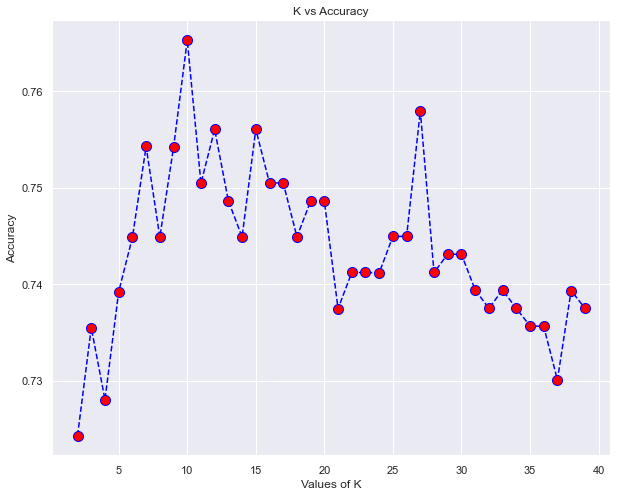

In [26]:
plt.figure(figsize=(10,8))
plt.plot(range(2,40),accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title("K vs Accuracy")
plt.xlabel("Values of K")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Error')

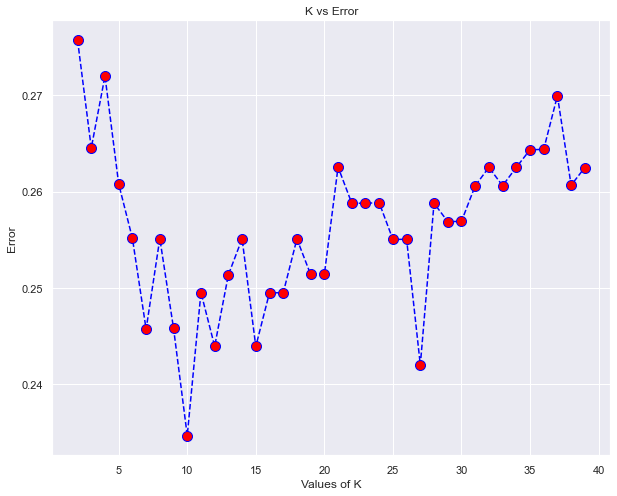

In [27]:
plt.figure(figsize=(10,8))
plt.plot(range(2,40),error,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title("K vs Error")
plt.xlabel("Values of K")
plt.ylabel("Error")

In [28]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [29]:
knn_gs = KNeighborsClassifier()

In [30]:
param_grid = {'n_neighbors' : np.arange(2,40), 'p':[2]}
param_grid

{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39]),
 'p': [2]}

In [31]:
gscv_model = GridSearchCV(knn_gs,param_grid, cv = 5) # CV : if extreamly high then model will overfit 
gscv_model.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                         'p': [2]})

In [32]:
gscv_model.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [33]:
randomcv_model = RandomizedSearchCV(knn_gs,param_grid, cv = 5) # CV : if extreamly high then model will overfit 
randomcv_model.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                                        'p': [2]})

In [34]:
best_k = gscv_model.best_estimator_.n_neighbors

# Lets Train for K = 10

In [35]:
knn = KNeighborsClassifier(n_neighbors=best_k) # K = 1
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [36]:
# Accuracy for Train
knn.score(X_train,Y_train)

0.8063314711359404

In [37]:
# Accuracy for Test
knn.score(X_test,Y_test)

0.7662337662337663

# Lets Predict for test

In [38]:
Y_pred = knn.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
confusion_matrix(Y_test,Y_pred)

array([[138,  12],
       [ 42,  39]], dtype=int64)

In [41]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       150
           1       0.76      0.48      0.59        81

    accuracy                           0.77       231
   macro avg       0.77      0.70      0.71       231
weighted avg       0.77      0.77      0.75       231

